In [1]:
import importlib
from utils import aspect_extraction, sentiment_extraction, general, embeddings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [22]:
importlib.reload(aspect_extraction)
importlib.reload(sentiment_extraction)
importlib.reload(general)
importlib.reload(embeddings)

<module 'utils.embeddings' from '/home/alessia/Documenti/University/Text mining and sentiment analysis/progetto/tinder/utils/embeddings.py'>

In [5]:
aspects_adjs, aspects_freq = aspect_extraction.get_aspects_adjs_and_freq()

In [20]:
aspects_polarity = sentiment_extraction.get_aspects_polarity(aspects_adjs)
aspects_score = general.normalize_series(aspects_polarity + aspects_freq)
aspects_embedding = embeddings.get_aspects_embeddings(aspects_freq)

In [4]:
def get_query_polarity_percentage(query, not_query = [], threshold=0.5, verbose=False):
    query_ranking = embeddings.get_query_similarities(
    aspects_embedding, query, not_query=not_query)
    
    query_ranking = pd.concat([aspects_score, query_ranking], axis=1).rename(columns={
        0: "score", 1: "query_similarity"}).sort_values(by=["query_similarity", "score"], ascending=False)
    query_aspects = query_ranking[query_ranking.query_similarity >= threshold].index

    pos, neg = sentiment_extraction.get_aspects_polarity_percentage(
        query_aspects, aspects_adjs, verbose=verbose)
        
    return pos, neg, query_aspects, query_ranking

__Casual sex__

In [7]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["casual", "sex"])
print(f"positive: {pos}, negative: {neg}")

expansion: ['casual', 'sex', 'sexual', 'anal sex', 'casual', 'chastity bono announces', 'cybersex', 'mutual masturbation', 'extramarital sex', 'faking orgasms', 'penetrative sex', 'sexual intercourse']
positive: 37.77777777777778, negative: 62.22222222222222


In [25]:
query_ranking.head()

,score,query_similarity
sex,0.698583,0.858055
sexual,0.733324,0.820098
intercourse,0.743922,0.750975
masturbation,0.743743,0.742415
homosexual,0.734047,0.612871


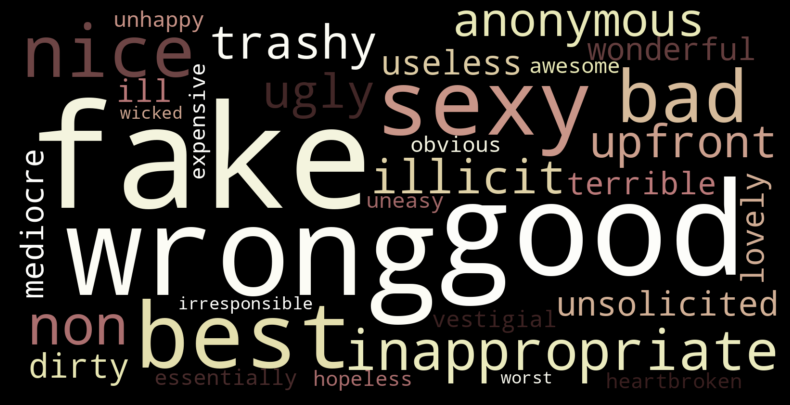

In [26]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [46]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs)

  0%|          | 0/68 [00:00<?, ?it/s]

['gay', 'great', 'intellectual']
['interested', 'interesting']


In [8]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, pos=False)

  0%|          | 0/152 [00:00<?, ?it/s]

['bad', 'wrong']


__Relationship__

In [9]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "love"], not_query= ["friendship", "hate"])

expansion: ['relationship', 'love', 'relationships', 'hank baskett iv', 'husband royston langdon', 'contractual arrangements', 'partnership', 'partner', 'arrangement', 'partership', 'sattawala', 'tyco valves']


In [10]:
print(f"positive: {pos}, negative: {neg}")

positive: 86.8421052631579, negative: 13.157894736842104


In [11]:
query_ranking.head()

,score,query_similarity
relationship,0.863758,0.739650
relationships,0.833228,0.693989
arrangement,0.740834,0.648102
partnership,0.744610,0.626701
arrangements,0.739060,0.546573


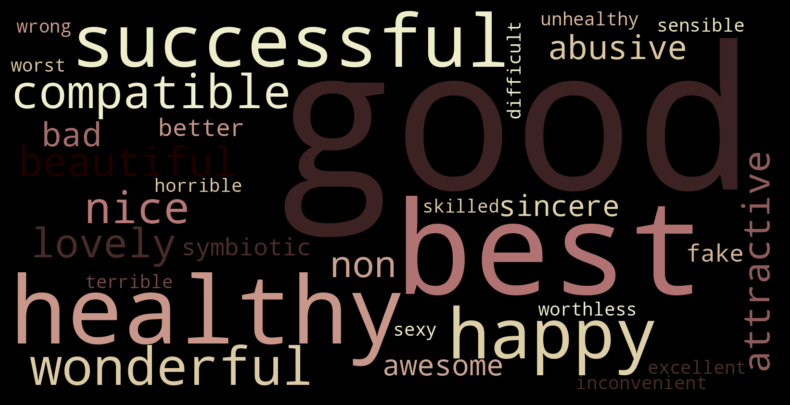

In [19]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [12]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs)

  0%|          | 0/305 [00:00<?, ?it/s]

['great', 'intimate', 'gay']
['better', 'good']


In [13]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, pos =False)

  0%|          | 0/72 [00:00<?, ?it/s]

['bad', 'wrong']
['needy', 'dead']
['difficult', 'hard']


__Friendship__

In [14]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends",  "new"], not_query= ["relationship", "love"])
print(f"positive: {pos}, negative: {neg}")

expansion: ['friendship', 'friends', 'new', 'relatives', 'richeys', 'acquaintances', 'schoolmates', 'newest', 'classmates', 'well wishers', 'newcomers', 'family', 'social networking']
positive: 93.38654503990878, negative: 6.61345496009122


In [13]:
query_ranking.head()

,score,query_similarity
friends,1.000000,0.810469
acquaintances,0.752590,0.711225
relatives,0.745606,0.669948
classmates,0.746072,0.662747
family,0.786215,0.627363


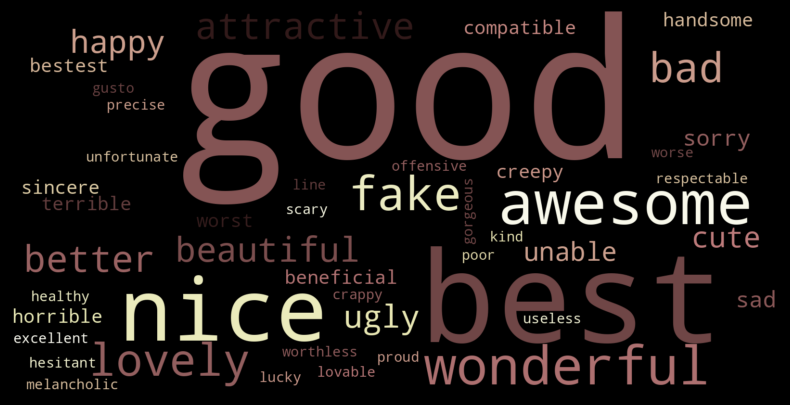

In [14]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [15]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs)

  0%|          | 0/1080 [00:00<?, ?it/s]

['plus', 'better', 'good']
['great', 'dear', 'gay']
['interesting', 'interested']
['kind', 'like']


In [16]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, pos=False)

  0%|          | 0/142 [00:00<?, ?it/s]

['melancholic', 'stupid', 'unfortunate']
['worse', 'bad']
['offensive', 'annoying']
['poor', 'dead']


__Curiosity__

In [17]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity"])

expansion: ['curiosity', 'curiousity', 'inquisitiveness', 'innate curiosity', 'morbid curiosity', 'fascination', 'intellectual curiosity', 'insatiable curiosity', 'curiosities', 'wonderment', 'childlike curiosity']
positive: 37.5, negative: 62.5


In [25]:
print(f"positive: {pos}, negative: {neg}")

positive: 37.5, negative: 62.5


In [18]:
query_ranking.head()

,score,query_similarity
curiosity,0.745328,0.935293
lust,0.751730,0.579907
obsession,0.759316,0.571357
passion,0.760427,0.570375
playfulness,0.746507,0.565614


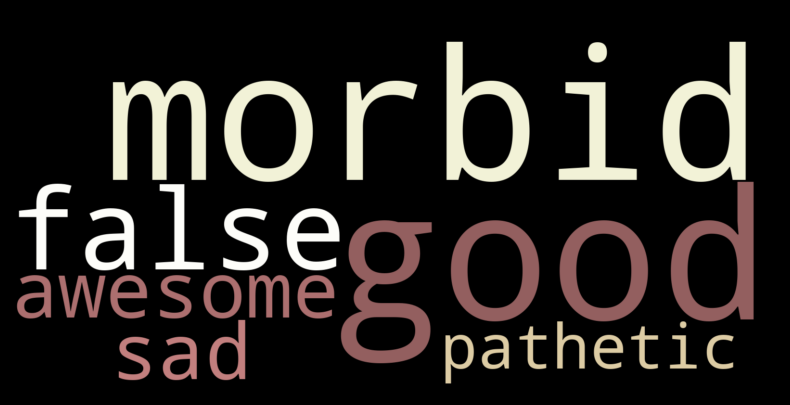

In [17]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [23]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs)

  0%|          | 0/7 [00:00<?, ?it/s]

In [24]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, pos=False)

  0%|          | 0/5 [00:00<?, ?it/s]

__Women__

In [26]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["woman", "girl"], not_query= ["men", "boy"])
print(f"positive: {pos}, negative: {neg}")

expansion: ['woman', 'girl', 'businesswoman', 'she', 'herself', 'her', 'housewife', 'lady', 'actress', 'burlesque dancer', 'songstress', 'reinvents herself']
positive: 83.65758754863813, negative: 16.342412451361866


In [19]:
query_ranking.head()

,score,query_similarity
woman,0.988964,0.746109
actress,0.751113,0.726695
her,0.749812,0.721337
she,0.747983,0.708155
girl,0.851474,0.704687


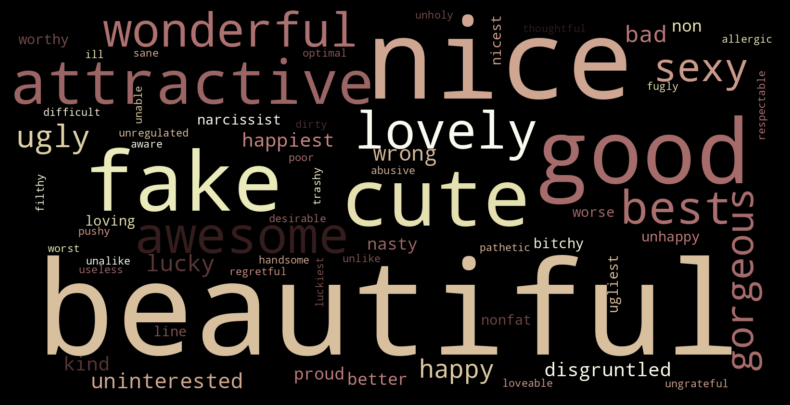

In [20]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [27]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs)

  0%|          | 0/874 [00:00<?, ?it/s]

['great', 'worthy', 'beloved', 'intellectual', 'narcissist', 'gay', 'bisexual']
['better', 'good', 'quality']
['happy', 'happiest']
['lucky', 'luckiest']
['kind', 'ideal']
['interesting', 'interested']


In [28]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, pos=False)

  0%|          | 0/229 [00:00<?, ?it/s]

['worse', 'bad', 'wrong']
['poor', 'needy', 'dead']
['ugliest', 'ugly']
['difficult', 'hard']
['upset', 'ill']
['stupid', 'silly']


__Men__

In [29]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["men", "boy", "guy"], not_query=["woman", "girl"])

expansion: ['men', 'boy', 'guy', 'guys', 'dude', 'dudes', 'buddies', 'guys', 'buddy', 'kid', 'hitting fungos', 'fellas', 'crooks sociopaths']
positive: 69.69450101832993, negative: 30.30549898167006


In [34]:
print(f"positive: {pos}, negative: {neg}")

positive: 69.69450101832993, negative: 30.30549898167006


In [30]:
query_ranking.head()

,score,query_similarity
guys,0.570776,0.825476
guy,0.924460,0.810841
dude,0.773058,0.777926
dudes,0.774991,0.775220
fellas,0.781378,0.758112


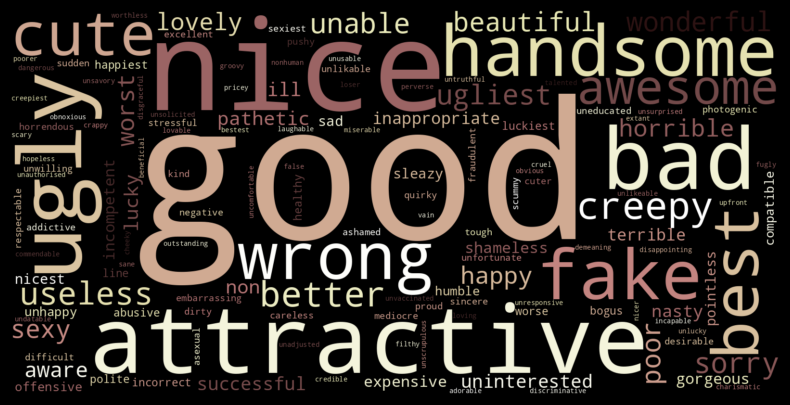

In [31]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [32]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs)

  0%|          | 0/2602 [00:00<?, ?it/s]

['great', 'dear', 'gay', 'bisexual']
['plus', 'better', 'good']
['kind', 'ideal', 'like']
['interesting', 'interested']
['cute', 'cuter']
['aged', 'rich']
['happy', 'happiest']
['nicer', 'nicest']
['sexy', 'sexiest']
['lucky', 'luckiest']
['richer', 'richest']
['well', 'classic']


In [33]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, pos=False)

  0%|          | 0/1197 [00:00<?, ?it/s]

['tough', 'stupid', 'incompetent', 'illiterate', 'silly', 'mortal', 'loser', 'homeless', 'unfortunate', 'phony']
['evil', 'foul', 'offensive', 'negative', 'annoying']
['poor', 'dead', 'sick']
['worse', 'bad', 'wrong']
['difficult', 'hard']
['ugliest', 'ugly']
['upset', 'ill']
['horrendous', 'terrible']
['creepiest', 'creepy']
['dumb', 'dumbest']
['pathetic', 'poorer']
['disappointing', 'disappointed']
['sour', 'bitter']
['cheaper', 'cheap']
['unlikeable', 'unlikable']
['embarrassing', 'embarrassed']
['rough', 'unknown']


__Self Esteem__

In [35]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"])
print(f"positive: {pos}, negative: {neg}")

expansion: ['self', 'esteem', 'self esteem', 'selfconfidence', 'manly virtues', 'reverence', 'ego', 'amour propre', 'respectfulness', 'wholeheartedness', 'narcissistic', 'dutifulness']
positive: 45.45454545454545, negative: 54.54545454545454


In [25]:
query_ranking.head()

,score,query_similarity
ego,0.754589,0.637566
esteem,0.748202,0.634069
narcissism,0.752988,0.605324
self,0.742616,0.573785
affection,0.744610,0.566085


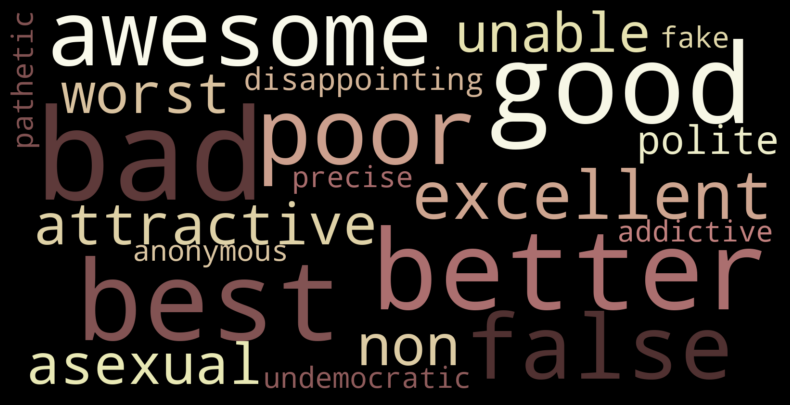

In [26]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [36]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs)

  0%|          | 0/25 [00:00<?, ?it/s]

['better', 'good']


In [37]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, pos=False)

  0%|          | 0/84 [00:00<?, ?it/s]

__Attractiveness (appearence)__

In [38]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence"], threshold=0.4)
print(f"positive: {pos}, negative: {neg}")

expansion: ['attractiveness', 'appearence', 'appearance', 'apperance', 'desirability', 'attractive', 'marketability', 'facial attractiveness', 'appearance', 'comeliness', 'facial symmetry', 'allure']
positive: 25.252525252525253, negative: 74.74747474747475


In [28]:
query_ranking.head()

,score,query_similarity
attractiveness,0.736023,0.715515
appearance,0.765046,0.637597
aesthetic,0.756520,0.470258
beauty,0.745334,0.469298
unattractive,0.734795,0.459300


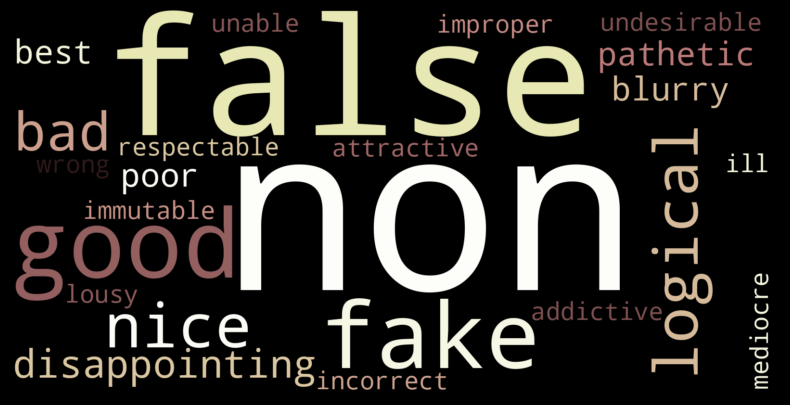

In [29]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [39]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs)

  0%|          | 0/53 [00:00<?, ?it/s]

['interesting', 'interested']


In [40]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, pos=False)

  0%|          | 0/92 [00:00<?, ?it/s]

['bad', 'wrong']


__Attractiveness (intelligence)__

In [41]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"], threshold=0.4)
print(f"positive: {pos}, negative: {neg}")

expansion: ['witty', 'intelligence', 'perceptive', 'tapes knocke', 'humor', 'insightful', 'quick witted', 'wit', 'intelligence', 'sharp witted', 'rapier sharp', 'dryly humorous']
positive: 60.0, negative: 40.0


In [31]:
query_ranking.head()

,score,query_similarity
wit,0.727836,0.710288
humor,0.765109,0.675605
sarcastic,0.741358,0.616033
sly,0.743165,0.609330
funny,0.793540,0.593727


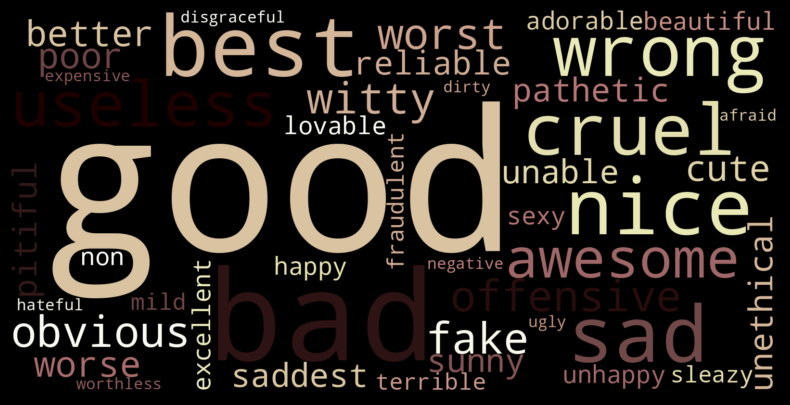

In [32]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [42]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs)

  0%|          | 0/250 [00:00<?, ?it/s]

['better', 'good']


In [43]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, pos=False)

  0%|          | 0/121 [00:00<?, ?it/s]

['worse', 'bad', 'wrong']
['poor', 'sick']
['negative', 'offensive']
['stupid', 'silly']
['sad', 'saddest']
